# Notebook Overview

The kaggle contest I am working on has provided two separate datasets. So after conducting analysis on the two datasets I decided to implement a non-deep learning approach for the MIT-BIH dataset and then a deep learning approach for the PTB dataset.

The non-deep learning approach is split into 4 sections: EDA, Data Balancing, Model Implementation, Results.

The deep-learning approach is split into 3 sections Data Analysis, Model Implementation, Results,

By: Abhi Vetukuri

## MIT-BIH Arrhythmia Dataset

### 1.1 Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pandas as pd

In [ ]:
df_train = pd.read_csv('/content/mitbih_train.csv', header=None)
print("The shape of train dataset : ",df_train.shape)
df_train.head()

The shape of train dataset :  (87554, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test = pd.read_csv('/content/mitbih_test.csv',header=None)
print("The shape of test dataset : ",df_test.shape)
df_test.head()

The shape of test dataset :  (21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train[187] = df_train[187].astype('int64')
target_col = df_train[187]
df_test[187] = df_test[187].astype('int64')
test_target_col = df_test[187]
labels = ['Normal beat','Supraventricular premature beat','Premature ventricular contraction','Fusion of ventricular and normal beat','Unclassifiable beat']

In [ ]:
pd.Series(np.bincount(target_col),index=labels)

Normal beat                              72471
Supraventricular premature beat           2223
Premature ventricular contraction         5788
Fusion of ventricular and normal beat      641
Unclassifiable beat                       6431
dtype: int64

In [ ]:
pd.Series(np.bincount(test_target_col),index=labels)

Normal beat                              18118
Supraventricular premature beat            556
Premature ventricular contraction         1448
Fusion of ventricular and normal beat      162
Unclassifiable beat                       1608
dtype: int64

<ipython-input-236-4e95a72235de>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, fontsize= 10)


Text(0.5, 1.0, 'Training Dataset Distribution Among 5 Classes')

<Figure size 500x500 with 0 Axes>

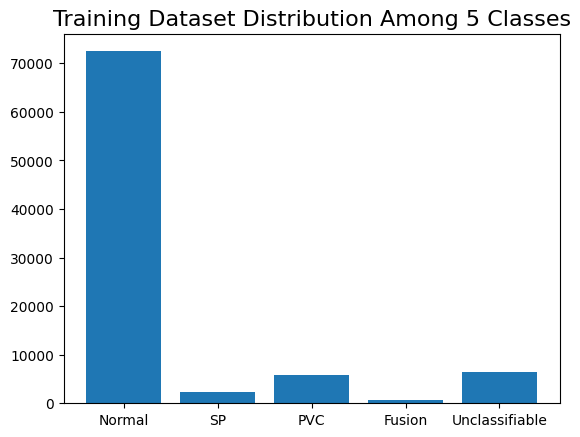

In [ ]:
new_labels = ["Normal", "SP", "PVC", "Fusion", "Unclassifiable"]
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
ax.bar(new_labels, [72471,2223,5788,641,6431])
ax.set_xticklabels(new_labels, fontsize= 10)
plt.title("Training Dataset Distribution Among 5 Classes",fontsize=16)

<ipython-input-237-c3f72e6f4c5f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels, fontsize= 10)


Text(0.5, 1.0, 'Test Dataset Distribution Among 5 Classes')

<Figure size 500x500 with 0 Axes>

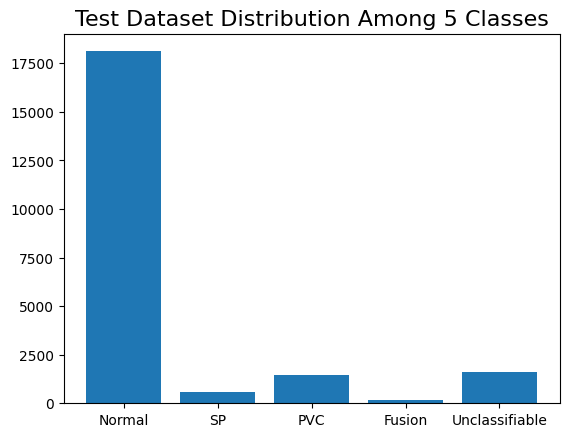

In [ ]:
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
ax.bar(new_labels, [18118,556,1448,162,1608])
ax.set_xticklabels(new_labels, fontsize= 10)
plt.title("Test Dataset Distribution Among 5 Classes",fontsize=16)

Both the training and test dataset bar graphs clearly show a big dataset imbalance in classes. This means that feature engineering or data normalization techniques must be applied before fitting and evaluating our algorithm.

### 1.2 Data Balancing


Through our data analysis above, it is clear that the normal beats (Class O) makes up a majority of the dataset compared to the abnormal beats. Almost an 80/20 split, therefore it will be better suited for us to undergo data balancing, making each of the 5 classes make up 20% of our training data. This is will ensure that the algorithm we train and select can accurately differeniate between each of the 5 classes. I'm using resample from Sklearn which I learned about through a [medium article](https://towardsdatascience.com/heres-what-i-ve-learnt-about-sklearn-resample-ab735ae1abc4). I'm upsampling all the minority classes, but don't need to upsample df_train0 because it is the majority class.

In [ ]:
from sklearn.utils import resample

df_train0= df_train[df_train[187]==0]
df_train1= df_train[df_train[187]==1]
df_train2= df_train[df_train[187]==2]
df_train3= df_train[df_train[187]==3]
df_train4= df_train[df_train[187]==4]

target0=(df_train0).sample(n=20000,random_state=42)
target1_sample=resample(df_train1,replace=True,n_samples=20000,random_state=0)
target2_sample=resample(df_train2,replace=True,n_samples=20000,random_state=0)
target3_sample=resample(df_train3,replace=True,n_samples=20000,random_state=0)
target4_sample=resample(df_train4,replace=True,n_samples=20000,random_state=0)

training_data=pd.concat([target0,target1_sample,target2_sample,target3_sample,target4_sample])

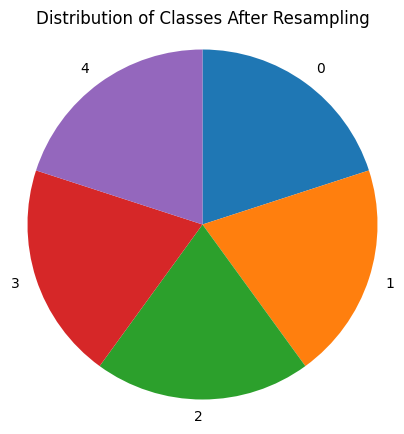

In [ ]:
sorted_counts = training_data[187].value_counts();
plt.figure(figsize = [5,5])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.title("Distribution of Classes After Resampling")
plt.axis('square');

We also follow a similar resampling process for our testing data, as we again want to select the algorithm that is best at differentiating between classes.


In [ ]:
df_test0= df_test[df_test[187]==0]
df_test1= df_test[df_test[187]==1]
df_test2= df_test[df_test[187]==2]
df_test3= df_test[df_test[187]==3]
df_test4= df_test[df_test[187]==4]

target0=(df_test0).sample(n=2000,random_state=42)
target1_sample=resample(df_test1,replace=True,n_samples=2000,random_state=0)
target2_sample=resample(df_test2,replace=True,n_samples=2000,random_state=0)
target3_sample=resample(df_test3,replace=True,n_samples=2000,random_state=0)
target4_sample=resample(df_test4,replace=True,n_samples=2000,random_state=0)

testing_data=pd.concat([target0,target1_sample,target2_sample,target3_sample,target4_sample])

### 1.3 ML Models Implementation


Because this dataset includes 5 classes and it is working with medical data, I believe that implementing non-deep learning solutions, atleast for this dataset is a wise choice. Understanding exactly how our algorithm is coming to its predictions is important when making life-changing predictions like in this case. With a deep-learning implementation we lose the ease of understanding what our algorithms logic really is. Furthermore, the restrictions based on my computer's performance is also another factor for making this choice.

Therefore, for this dataset I will be implementing a few of the most popular, and industry standard algorithms to get a sense of what the best performing algorithm would be. This could serve as a starting point for further algorithm optimization down the line.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [ ]:
Algorithms = {"LR": LogisticRegression(),"RF": RandomForestClassifier(),"Naive Bayes": GaussianNB(),"KNN": KNeighborsClassifier(),"XGB": XGBClassifier()}
X_train = training_data.drop(187, axis=1).values
y_train = training_data[187].values
X_test = testing_data.drop(187, axis=1).values
y_test = testing_data[187].values

In [ ]:
for name, algo in Algorithms.items():
    print(f'Training Model {name}')
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, algo.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print("")

Training Model LR


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to spec

Training Accuracy: 0.78102
Testing Accuracy: 0.7548
Testing Confusion Matrix: 
[[1261  248  256  174   61]
 [ 513 1282  110   71   24]
 [ 186   69 1416  229  100]
 [ 122    0  142 1736    0]
 [  52    5   80   10 1853]]
Recall Score :  0.7548
Precision Score :  0.7548
Testing F-1: 0.7548

Training Model RF
Training Accuracy: 1.0
Testing Accuracy: 0.8717
Testing Confusion Matrix: 
[[1979    8    9    2    2]
 [ 525 1462    2    2    9]
 [  82    1 1888   20    9]
 [ 335    0  222 1443    0]
 [  50    0    5    0 1945]]
Recall Score :  0.8717
Precision Score :  0.8717
Testing F-1: 0.8717

Training Model Naive Bayes


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Training Accuracy: 0.45545
Testing Accuracy: 0.4586
Testing Confusion Matrix: 
[[ 225   14  113  290 1358]
 [ 148  301  115  190 1246]
 [ 166    9  358  125 1342]
 [   0    0   14 1718  268]
 [   1    0    6    9 1984]]
Recall Score :  0.4586
Precision Score :  0.4586
Testing F-1: 0.45859999999999995

Training Model KNN


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Training Accuracy: 0.98929
Testing Accuracy: 0.8994
Testing Confusion Matrix: 
[[1865   74   28   17   16]
 [ 265 1642   73   11    9]
 [  24   30 1898   41    7]
 [ 131   15  226 1628    0]
 [  22    3   14    0 1961]]
Recall Score :  0.8994
Precision Score :  0.8994
Testing F-1: 0.8994

Training Model XGB


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Training Accuracy: 0.99971
Testing Accuracy: 0.9112
Testing Confusion Matrix: 
[[1958   18   16    3    5]
 [ 391 1575   14    8   12]
 [  56    4 1913   15   12]
 [ 166    0  136 1698    0]
 [  21    2    9    0 1968]]
Recall Score :  0.9112
Precision Score :  0.9112
Testing F-1: 0.9112



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Looking at the performance of each of the 5 algorithms, it is clear that the logistic regression and Naive Bayes algorithms performed the worst with 75% and 45% testing accuracies respectively. The Random Forests, KNN, and XGBoost algorithms performed the best, all three showed extremely high training accuracies, especially the RF model who had a perfect 1.0. However, the highest performing algorithm on the test set was the XGBoost algorithm. So that will be our choice for predictions on the dataset. If we were conducting a more rigorous analysis, all three algorithms could be optimized and further pruned to find the most optimal algorithm. But for now XGBoost will be our choice.

### 1.4 Results

Now that we have selected the XGBoost algorithm as our best performing algorithm for this dataset. We will calculate its true accuracy on the test data given to us. The previous testing accuracy was based on the balanced testing data we created before.

In [ ]:
best_algo = XGBClassifier()
best_algo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

Now looking at the accuracy of our model on the actual testing dataset given to us, we have reached an accuracy of 97.35%. Which is very high considering how we are using the standard XGBoost algorithm. To further improve the quality of the model, common optimization algorithms such as Grid Search or Random Search could be used.

In [ ]:
test_data = pd.read_csv('/content/mitbih_test.csv', header = None)

X_test = test_data.drop(187, axis = 1)
y_test = test_data[187]

y_pred = best_algo.predict(X_test)

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.35%


Here is a full visualization of the XGBoost model, the size of the model makes the visualization difficult to see, but by downloading or clicking on it, the image should expand and you should be able to see the nodes of the decision tree.

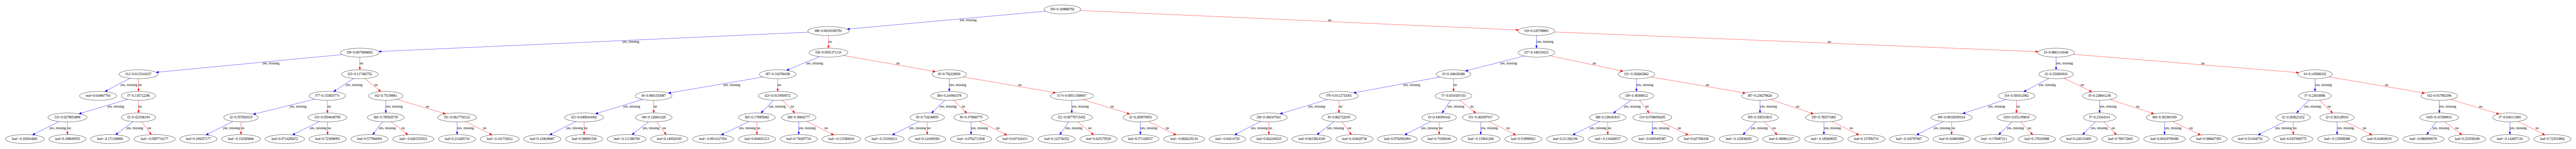

In [ ]:
plot_tree(best_algo)
fig = plt.gcf()
fig.set_size_inches(75, 25)

Below are better representations of the quality of the model besides just accuracy. We have both a confusion matrix and classification report. More details about the model performance is found below. The model performs well but there is some classification error between classes 0 and 1, this is something that could be further looked into and fixed using the optimization algorithms mentioned previously.

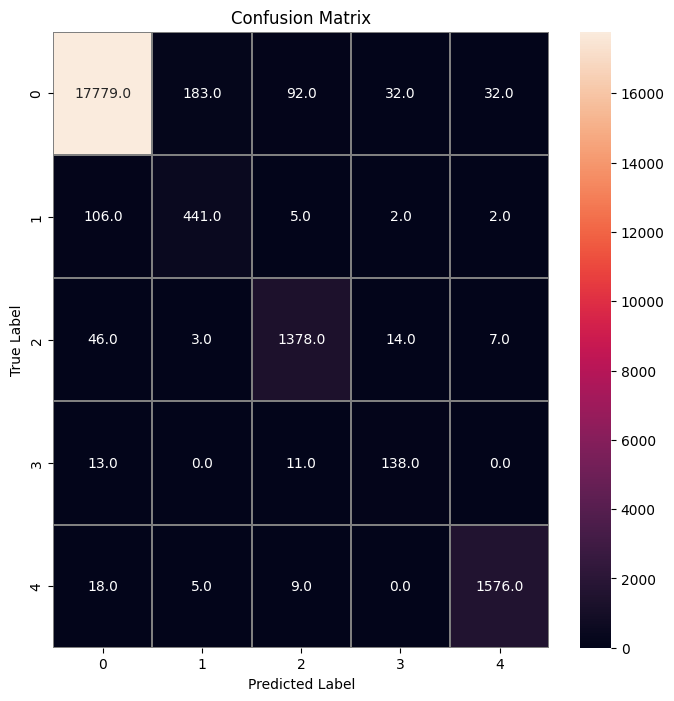

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, predictions)

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     18118
         1.0       0.70      0.79      0.74       556
         2.0       0.92      0.95      0.94      1448
         3.0       0.74      0.85      0.79       162
         4.0       0.97      0.98      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.87      0.91      0.89     21892
weighted avg       0.97      0.97      0.97     21892



##  PTB Diagnostic ECG Database

### 2.1 EDA on PTBDB Dataset

In [ ]:
df_normal = pd.read_csv('/content/ptbdb_normal.csv',header=None)
print("The shape of normal dataset : ",df_train.shape)
df_normal.head()

The shape of normal dataset :  (87554, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_abnormal = pd.read_csv('/content/ptbdb_abnormal.csv',header=None)
print("The shape of abnormal dataset : ",df_abnormal.shape)
df_abnormal.head()

The shape of abnormal dataset :  (10506, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Data is provided as two csv's, separated based by class, the two classes being "normal" and "abnormal". Therefore, we must concatenate the two classes into one dataset before making our training and testing random splits. I arbitrarily assign 0 as the value for our normal class and 1 as the value for the abnormal class. I am using a standard 80/10/10 train validation test split.

In [ ]:
from sklearn.model_selection import train_test_split

df_abnormal = df_abnormal.drop([187], axis=1)
df_normal = df_normal.drop([187], axis=1)

y_abnormal = np.ones((df_abnormal.shape[0]))
y_abnormal = pd.DataFrame(y_abnormal)
y_normal = np.zeros((df_normal.shape[0]))
y_normal = pd.DataFrame(y_normal)

X = pd.concat([df_normal, df_abnormal], sort=True)
y = pd.concat([y_normal, y_abnormal] ,sort=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=42)
X_test = X_test[:1455]
y_test = y_test[:1455]

In [ ]:
print("X_train.shape: ")
print(X_train.shape)
print("y_train.shape: ")
print(y_train.shape)
print("X_test.shape: ")
print(X_test.shape)
print("y_test.shape: ")
print(y_test.shape)
print("X_valid.shape: ")
print(X_valid.shape)
print("y_valid.shape: ")
print(y_valid.shape)

X_train.shape: 
(11641, 187)
y_train.shape: 
(11641, 1)
X_test.shape: 
(1455, 187)
y_test.shape: 
(1455, 1)
X_valid.shape: 
(1455, 187)
y_valid.shape: 
(1455, 1)


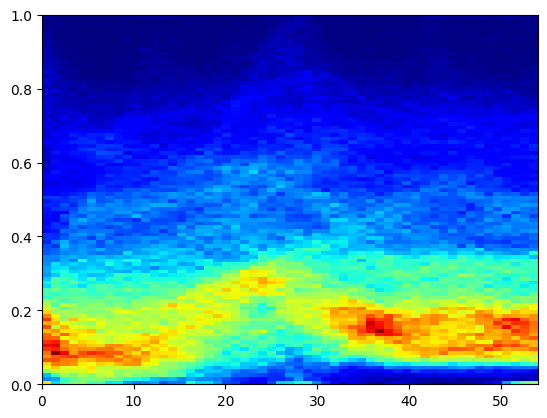

In [ ]:
flatten_ab_y = (df_abnormal.values)

flatten_ab_y  = flatten_ab_y[:,5:60].flatten()

ab_x=np.arange(0,55)
ab_x = np.tile(ab_x, df_abnormal.shape[0])

plt.hist2d(ab_x, flatten_ab_y, bins = (55,100), cmap = plt.cm.jet)

plt.show()

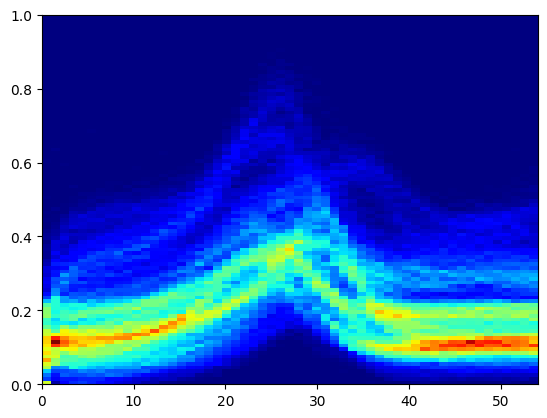

In [ ]:
flatten_ab_y = (df_normal.values)

flatten_ab_y  = flatten_ab_y[:,5:60].flatten()

ab_x=np.arange(0,55)
ab_x = np.tile(ab_x, df_normal.shape[0])

plt.hist2d(ab_x, flatten_ab_y, bins = (55,100), cmap = plt.cm.jet)

plt.show()

The two bi-directional histograms above show us that most of the data is within the 0.0 to 0.35 range for the abnormal values. There doesn't seem to be a distinct pattern or curve showing though, outside of the range. The normal values do show more of a pattern and a more distinct curve, especially with a peak around 25.

### 2.2 Deep Learning Implementation

For this deep learning model I decided to use a convolutional neural network. Based on the paper [ArXiv 1805.00794](https://arxiv.org/pdf/1805.00794.pdf), a convolutional neural network was found to be very effective. Furthermore, past kagglers have found success in implementing a neural network such as [kphanipavan](https://www.kaggle.com/code/kphanipavan/using-conv1d-reach-the-accuracy-98-30-by-pytorch). Therefore, I decided on building a CNN with a simple architecture.

I have decided to use L2 regulizers to prevent overfitting of the data, as the dataset isn't quite large enough to overlook this issue, especially when training a neural net. Furthremore, I used relu as the activation just as a default. I played around with other small architecture changes and tuning of hyperparameters but this was the final model that I found had a good accuracy and small training time. The amount of computing power and the time needed to train the model was my main limiting factor and big reason I didn't do more fine tuning or go for a more aggresive architecture for my model.

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Conv1D, Dropout, Flatten, MaxPooling1D, AveragePooling1D, ReLU, Softmax, GlobalAveragePooling1D, Add
from tensorflow.keras.regularizers import L2
from keras.utils.vis_utils import plot_model

def Basic_CNN():

    input_layer = Input(shape = (187,1))

    conv_1 = Conv1D(filters=32, kernel_size = 3, strides = 1, padding="same") (input_layer)

    relu_1 = ReLU() (conv_1)

    maxpool_1 = MaxPooling1D(pool_size=2, strides=None, padding='valid') (relu_1)

    flatten = Flatten() (maxpool_1)

    dense_1 = Dense(64, activation=ReLU(), kernel_regularizer = L2()) (flatten)

    output_layer = Dense(1, activation="sigmoid", kernel_regularizer = L2()) (dense_1)

    return Model(inputs=input_layer, outputs=output_layer)

Basic_CNN = Basic_CNN()
Basic_CNN.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 187, 1)]          0         
                                                                 
 conv1d_31 (Conv1D)          (None, 187, 32)           128       
                                                                 
 re_lu_62 (ReLU)             (None, 187, 32)           0         
                                                                 
 max_pooling1d_31 (MaxPoolin  (None, 93, 32)           0         
 g1D)                                                            
                                                                 
 flatten_30 (Flatten)        (None, 2976)              0         
                                                                 
 dense_61 (Dense)            (None, 64)                190528    
                                                          

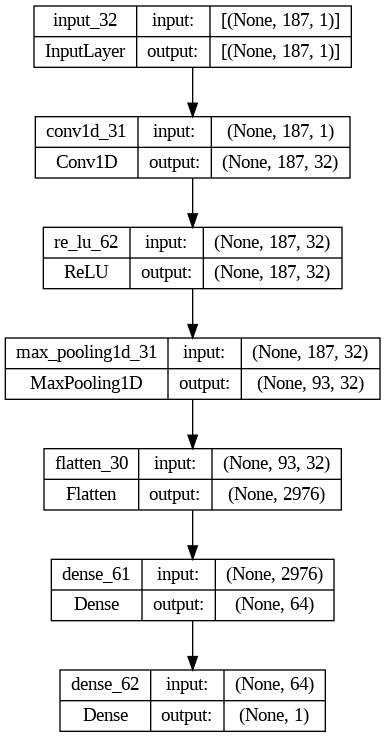

In [ ]:
plot_model(Basic_CNN, show_shapes=True, show_layer_names=True)

In [ ]:
Basic_CNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC()])
Basic_CNN_history = Basic_CNN.fit(x=X_train, y=y_train, batch_size=1000, epochs=100, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/100
12/12 [==============================] - 3s 143ms/step - loss: 1.5160 - binary_accuracy: 0.7053 - auc_26: 0.5874 - val_loss: 1.1242 - val_binary_accuracy: 0.7216 - val_auc_26: 0.7074
Epoch 2/100
12/12 [==============================] - 1s 116ms/step - loss: 0.9338 - binary_accuracy: 0.7332 - auc_26: 0.7412 - val_loss: 0.7550 - val_binary_accuracy: 0.7299 - val_auc_26: 0.7670
Epoch 3/100
12/12 [==============================] - 1s 115ms/step - loss: 0.6722 - binary_accuracy: 0.7496 - auc_26: 0.7769 - val_loss: 0.5971 - val_binary_accuracy: 0.7519 - val_auc_26: 0.8007
Epoch 4/100
12/12 [==============================] - 1s 117ms/step - loss: 0.5660 - binary_accuracy: 0.7626 - auc_26: 0.8094 - val_loss: 0.5379 - val_binary_accuracy: 0.7581 - val_auc_26: 0.8242
Epoch 5/100
12/12 [==============================] - 2s 129ms/step - loss: 0.5248 - binary_accuracy: 0.7724 - auc_26: 0.8290 - val_loss: 0.5140 - val_binary_accuracy: 0.7588 - val_auc_26: 0.8389
Epoch 6/100
12/12 [======

### 2.3 Results


In [ ]:
y_pred = Basic_CNN.predict(X_valid).tolist()

predictions = [np.round(value) for value in y_pred]

accuracy = accuracy_score(y_valid, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

46/46 [==============================] - 0s 6ms/step
Accuracy: 86.05%


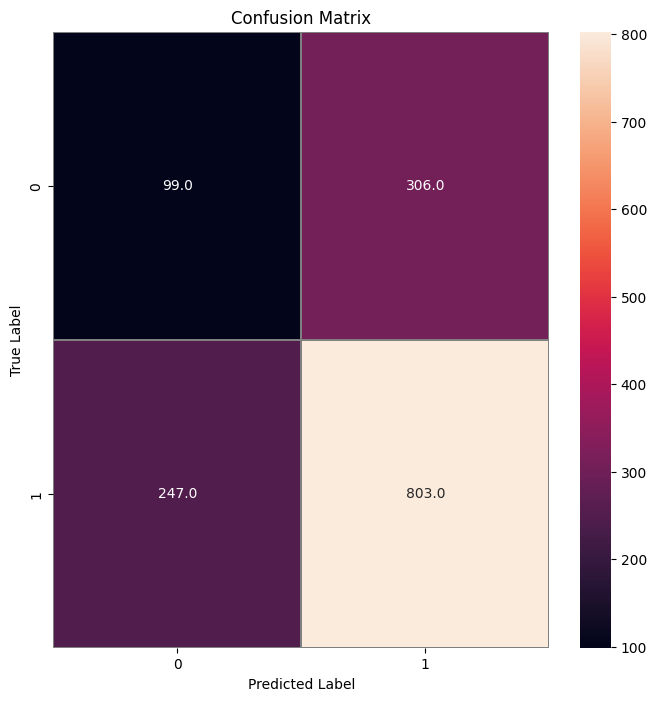

              precision    recall  f1-score   support

         0.0       0.29      0.24      0.26       405
         1.0       0.72      0.76      0.74      1050

    accuracy                           0.62      1455
   macro avg       0.51      0.50      0.50      1455
weighted avg       0.60      0.62      0.61      1455



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, predictions)

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.29      0.24      0.26       405
         1.0       0.72      0.76      0.74      1050

    accuracy                           0.62      1455
   macro avg       0.51      0.50      0.50      1455
weighted avg       0.60      0.62      0.61      1455



The final accuracy of the model is 86.05%, which I consider pretty high given the simplicity of the architecture and the limiting computing power I have. Looking at the confusion matrix, clearly there is a lot of error in predictions, especially with accurately predicting class 0. So this could be an area of future analysis and model tuning to account for the model's current bias.

## 3.1 Conclusion and References

For the two datasets given in this kaggle competition, I applied one deep learning approach and one non-deep learning approach. The non-deep learning approach on the MIT-BIH dataset yield high accuracy results with minimal training time compared to the deep learning method. This logically makes sense as prior kagglers have found much higher accuracy models when modeling the MIT-BIH dataset compared to the PTB. Conducting pruning and tuning hyperparamets could be some ways to improve our XGBoost model and get it to upwards of 99% accuracy.

For the PTB dataset, generally kagglers found it more challenging to build a high performing model. Therefore I opted to try a deep learning solution, ultimately the CNN I implemented showed promise, as prior analyzers of the dataset found good success with it. So with more tuning and parameter or layer tweaks, the model could definetly reach higher than 90% accuracy. Even more epochs of training could achieve this result.

Below are some resources I consulted.

https://arxiv.org/pdf/1805.00794.pdf

https://analyticsindiamag.com/kernel-regularizers-with-neural-networks/

https://www.kaggle.com/code/twtylerwilson/starter-ecg-heartbeat-categorization-8431d523-6

https://github.com/dave-fernandes/ECGClassifier/blob/master/ClassifyECG.ipynb
